In [1]:
import finesse.virgo
import finesse.analysis.actions as fa
from finesse.virgo.actions import DARM_RF_to_DC

In [2]:
# simple make, can be configured, returns model
model = finesse.virgo.make_virgo(
    maxtem="off",
    thermal_state="design-matched",
    use_3f_error_signals=False,
    with_apertures=False,
    x_scale=1,
    zero_k00=False,
    display_plots=False,
    verbose=False,
)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


In [3]:
# can also make from a modified model
virgo = finesse.virgo.Virgo()
virgo.model.parse("var test 1")
virgo.make()
print('test =', virgo.model.test.value)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.
test = 1.0


In [4]:
# or make step by step
virgo = finesse.virgo.Virgo()
virgo.model.parse("var state 0")
# virgo.adjust_recycling_cavities()
virgo.adjust_recycling_cavity_length("PRC", "lPRC", "lPOP_BS")
virgo.adjust_recycling_cavity_length("SRC", "lSRC", "lsr")
virgo.pretune() # now in pretuned state

# and modify the model in between
virgo.model.state.value += 1

virgo.apply_dc_offset()
virgo.optimize_demodulation_phase()
virgo.model.run(fa.RunLocks(method="newton"))
virgo.model.state.value += 1

virgo.model.run(DARM_RF_to_DC()) # now in dc locked state
virgo.model.state.value += 1

print('state =', virgo.model.state.value)

state = 3.0


In [5]:
# the model is accessible and can be replaced, but this breaks state
#   meaning configurable settings are potentially wrong
#   and would need to be set manually
virgo = finesse.virgo.Virgo()
virgo.print_thermal_values()

virgo.model = finesse.virgo.make_virgo(thermal_state="cold")
virgo.print_thermal_values()

print(virgo.thermal_state) # should be "cold"
virgo.thermal_state = "cold"

virgo.model.parse("var test 1")
virgo.model.unparse()
virgo.model.mismatches_table()


┌───────────────────────────┐
│ Thermal                   │
│ Parameter  :  Value       │
├───────────────────────────┤
│ PR.Rcx     :  -1430.00    │
│ PR.Rcy     :  -1430.00    │
│ SR.Rcx     :  1430.00     │
│ SR.Rcy     :  1430.00     │
│ f_CPN_TL   :  -338003.00  │
│ f_CPW_TL   :  -353138.00  │
└───────────────────────────┘
Adjusting recycling cavity lengths...
Pretuning...


/home/jon/Repos/ligo/finesse/finesse3/src/finesse/model.py:3892: CavityUnstableWarning: The cavities ['cavPRW', 'cavPRN', 'cavSRW', 'cavSRN'] are unstable and will not be used for beam tracing.
  warn(


Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...


regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet


Switching to DARM DC lock...
Done.

┌───────────────────────────┐
│ Thermal                   │
│ Parameter  :  Value       │
├───────────────────────────┤
│ PR.Rcx     :  -1477.00    │
│ PR.Rcy     :  -1477.00    │
│ SR.Rcx     :  1443.00     │
│ SR.Rcy     :  1443.00     │
│ f_CPN_TL   :  inf         │
│ f_CPW_TL   :  inf         │
└───────────────────────────┘
None


regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of orig

Coupling,Mismatch (x),Mismatch (y)
BS.p1.i -> BS.p2.o,0.0000,0.0000
BS.p2.i -> BS.p1.o,0.0000,0.0000
BS.p2.i -> BS.p4.o,0.0000,0.0000
BS.p4.i -> BS.p2.o,0.0000,0.0000
NIAR.p1.i -> NIAR.p1.o,0.0000,0.0000
NIAR.p2.i -> NIAR.p2.o,0.0000,0.0000
OMC1_1.p1.i -> OMC1_1.p3.o,0.0003,0.0003
OMC1_1.p2.i -> OMC1_1.p4.o,0.0003,0.0003
OMC1_1.p3.i -> OMC1_1.p1.o,0.0003,0.0003
OMC1_1.p4.i -> OMC1_1.p2.o,0.0003,0.0003


/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


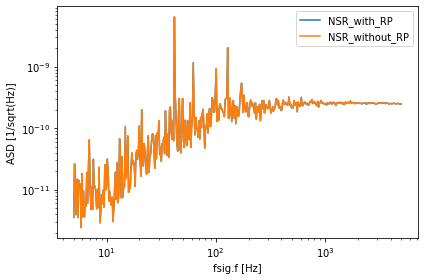

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


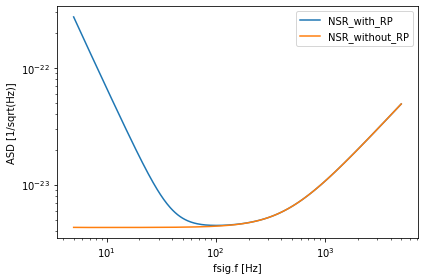

In [6]:
virgo = finesse.virgo.Virgo()
virgo.plot_QNLS()
virgo.make()
virgo.plot_QNLS()

In [7]:
# can be more verbose and display plots
virgo = finesse.virgo.Virgo(verbose=True, display_plots=True)
virgo.make()

Parsing common katfile...
Parsing additional katscript...
Adjusting recycling cavity lengths...
--  adjusting PRC length
    adjusting lPOP_BS.L by 0.0004736 m
--  adjusting SRC length
    adjusting lsr.L by 0.000883 m
Pretuning...
--  dof tunings
    NE_z: 0.0
    WE_z: 0.0
    MICH: 0.0
    PRCL: 0.0
    SRCL: 90.0
Optimizing demodulation phases...
--  Optimized demodulation phases:
    PRCL     B2_8_I    : phase= -3.4664
    MICH     B2_56_Q   : phase= 26.6982
    CARM     B2_6_I    : phase= -9.6529
    DARM     B1p_56_I  : phase= 41.7083
    SRCL     B2_56_I   : phase=-63.3018
--  Suggested lock gains:
    PRCL     B2_8_I    :   0.015668
    MICH     B2_56_Q   : -0.00050118
    CARM     B2_6_I    :     6.1892
    DARM     B1p_56_I  :     152.11
    SRCL     B2_56_I   : 0.00026163
Optimizing lock gains...
--  Optimized lock gains:
    PRCL     B2_8_I    :    -63.823
    MICH     B2_56_Q   :     1995.3
    CARM     B2_6_I    :   -0.16157
    DARM     B1p_56_I  : -0.0065742
    SRCL  

In [9]:
# individual steps can also be made verbose
# TODO: can improve verbosity
virgo = finesse.virgo.Virgo()
# virgo.adjust_recycling_cavities()
virgo.adjust_recycling_cavity_length("PRC", "lPRC", "lPOP_BS")
virgo.adjust_recycling_cavity_length("SRC", "lSRC", "lsr")
virgo.pretune(verbose=True) # now in pretuned state
virgo.apply_dc_offset(verbose=True)
virgo.optimize_demodulation_phase()
virgo.model.run(fa.RunLocks(method="newton")) # now in rf locked state
virgo.model.run(DARM_RF_to_DC()) # now in dc locked state

--  dof tunings
    NE_z: 0.0
    WE_z: 0.0
    MICH: 0.0
    PRCL: 0.0
    SRCL: 90.0


<BaseSolution of series @ 0x7fb19669cf90 children=0>

/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


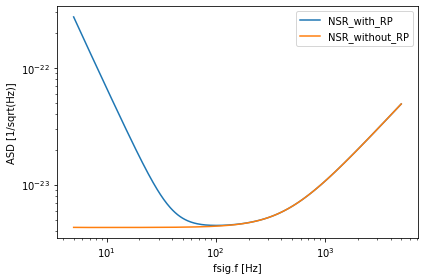

In [10]:
# locks can be run manually
virgo = finesse.virgo.Virgo()
# virgo.adjust_recycling_cavities()
virgo.adjust_recycling_cavity_length("PRC", "lPRC", "lPOP_BS")
virgo.adjust_recycling_cavity_length("SRC", "lSRC", "lsr")
virgo.pretune()
virgo.apply_dc_offset()
virgo.optimize_demodulation_phase()

virgo.optimize_lock_gains() # optimize manually
virgo.model.run(fa.RunLocks(method="newton")) # prevent run locks from optimizing

virgo.model.run(DARM_RF_to_DC())
virgo.plot_QNLS()

In [11]:
# Virgo can be deepcopied
virgo1 = finesse.virgo.Virgo()
virgo1.model.parse('var test 0')

virgo2 = virgo1.deepcopy()
virgo2.model.test.value = 1

print('virgo1.test =', virgo1.model.get('test').value)
print('virgo2.test =', virgo2.model.get('test').value)

virgo1.test = 0.0
virgo2.test = 1.0
